In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/impact-of-covid19-on-employment-ilostat/employment_data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.2f' % x) #To supress numarical display in scientific notation

In [3]:
data=pd.read_csv('/kaggle/input/impact-of-covid19-on-employment-ilostat/employment_data.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   country                                               283 non-null    object 
 1   total_weekly_hours_worked(estimates_in_thousands)     283 non-null    float64
 2   percentage_of_working_hrs_lost                        283 non-null    float64
 3   percent_hours_lost_40hrs_per_week                     283 non-null    float64
 4   percent_hours_lost_48hrs_per_week                     283 non-null    float64
 5   labour_dependency_ratio                               283 non-null    float64
 6   employed_female_25+_2019                              283 non-null    float64
 7   employed_male_25+_2019                                283 non-null    float64
 8   ratio_of_weekly_hours_worked_by_population_age_15-64  283 non

In [5]:
data['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Channel Islands',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Democratic Republic of the', 'Congo', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Guatemala',
     

In [6]:
data_list = ['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Channel Islands',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Democratic Republic of the', 'Congo', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Guatemala',
       'Guam', 'Guyana', 'Hong Kong, China', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 'Indonesia', 'India', 'Ireland',
       'Iran, Islamic Republic of', 'Iraq', 'Iceland', 'Israel', 'Italy',
       'Jamaica', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan',
       'Cambodia', 'Korea, Republic of', 'Kuwait',
       "Lao People's Democratic Republic", 'Lebanon', 'Liberia', 'Libya',
       'Saint Lucia', 'Sri Lanka', 'Lesotho', 'Lithuania', 'Luxembourg',
       'Latvia', 'Macau, China', 'Morocco', 'Moldova, Republic of',
       'Madagascar', 'Maldives', 'Mexico', 'North Macedonia', 'Mali',
       'Malta', 'Myanmar', 'Montenegro', 'Mongolia', 'Mozambique',
       'Mauritania', 'Mauritius', 'Malawi', 'Malaysia', 'Namibia',
       'New Caledonia', 'Niger', 'Nigeria', 'Nicaragua', 'Netherlands',
       'Norway', 'Nepal', 'New Zealand', 'Oman', 'Pakistan', 'Panama',
       'Peru', 'Philippines', 'Papua New Guinea', 'Poland', 'Puerto Rico',
       "Korea, Democratic People's Republic of", 'Portugal', 'Paraguay',
       'Occupied Palestinian Territory', 'French Polynesia', 'Qatar',
       'Romania', 'Russian Federation', 'Rwanda', 'Saudi Arabia', 'Sudan',
       'Senegal', 'Singapore', 'Solomon Islands', 'Sierra Leone',
       'El Salvador', 'Somalia', 'Serbia', 'South Sudan',
       'Sao Tome and Principe', 'Suriname', 'Slovakia', 'Slovenia',
       'Sweden', 'Eswatini', 'Syrian Arab Republic', 'Chad', 'Togo',
       'Thailand', 'Tajikistan', 'Turkmenistan', 'Timor-Leste', 'Tonga',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Taiwan, China',
       'Tanzania, United Republic of', 'Uganda', 'Ukraine', 'Uruguay',
       'United States', 'Uzbekistan', 'Saint Vincent and the Grenadines',
       'Venezuela, Bolivarian Republic of',
       'United States Virgin Islands', 'Viet Nam', 'Vanuatu', 'Samoa', 'MENA', 'CARICOM', 'Yemen', 'South Africa',
       'Zambia', 'Zimbabwe']

In [7]:
data_sv = data[data.country.isin(data_list)]

In [8]:
data_sv['country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Channel Islands',
       'Switzerland', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon',
       'Congo, Democratic Republic of the', 'Congo', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czechia',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara', 'Spain',
       'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon',
       'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Guatemala',
     

In [9]:
data_sv.describe()

,total_weekly_hours_worked(estimates_in_thousands),percentage_of_working_hrs_lost,percent_hours_lost_40hrs_per_week,percent_hours_lost_48hrs_per_week,labour_dependency_ratio,employed_female_25+_2019,employed_male_25+_2019,ratio_of_weekly_hours_worked_by_population_age_15-64
count,191.00,191.00,191.00,191.00,191.00,191.00,191.00,191.00
mean,688549.27,8.83,1664.40,1387.00,1.63,5976.24,9749.39,23.66
std,2817151.94,4.81,6120.93,5100.77,0.70,23945.33,38490.67,4.85
min,995.75,-0.10,-4.47,-3.72,0.32,10.83,15.21,12.00
25%,35898.32,5.15,60.25,50.21,1.16,331.81,564.05,20.55
50%,138225.81,8.60,266.06,221.72,1.45,1304.03,1878.26,23.60
75%,420082.16,11.75,1038.90,865.75,1.92,3840.24,5637.80,26.45
max,33243962.45,27.50,71600.12,59666.76,4.58,306274.25,391436.46,39.10


<AxesSubplot:>

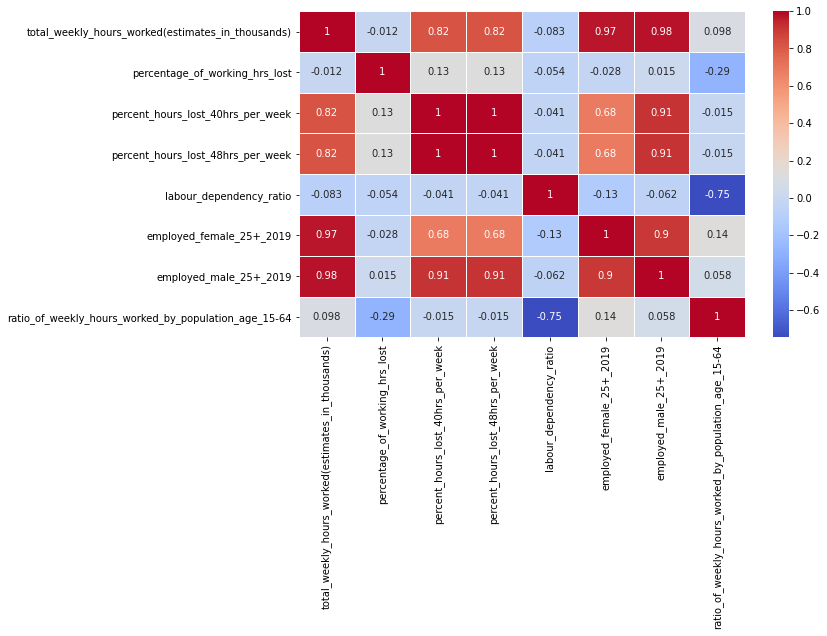

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data_sv.corr(),annot=True,linewidth = 1, cmap='coolwarm')

<AxesSubplot:>

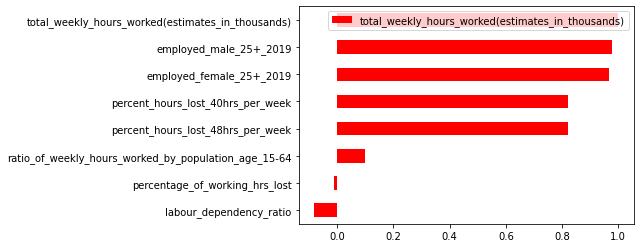

In [11]:
corr=data_sv.corr()[['total_weekly_hours_worked(estimates_in_thousands)']].sort_values(
    by='total_weekly_hours_worked(estimates_in_thousands)',ascending=True)
corr.plot(kind='barh',color='red')

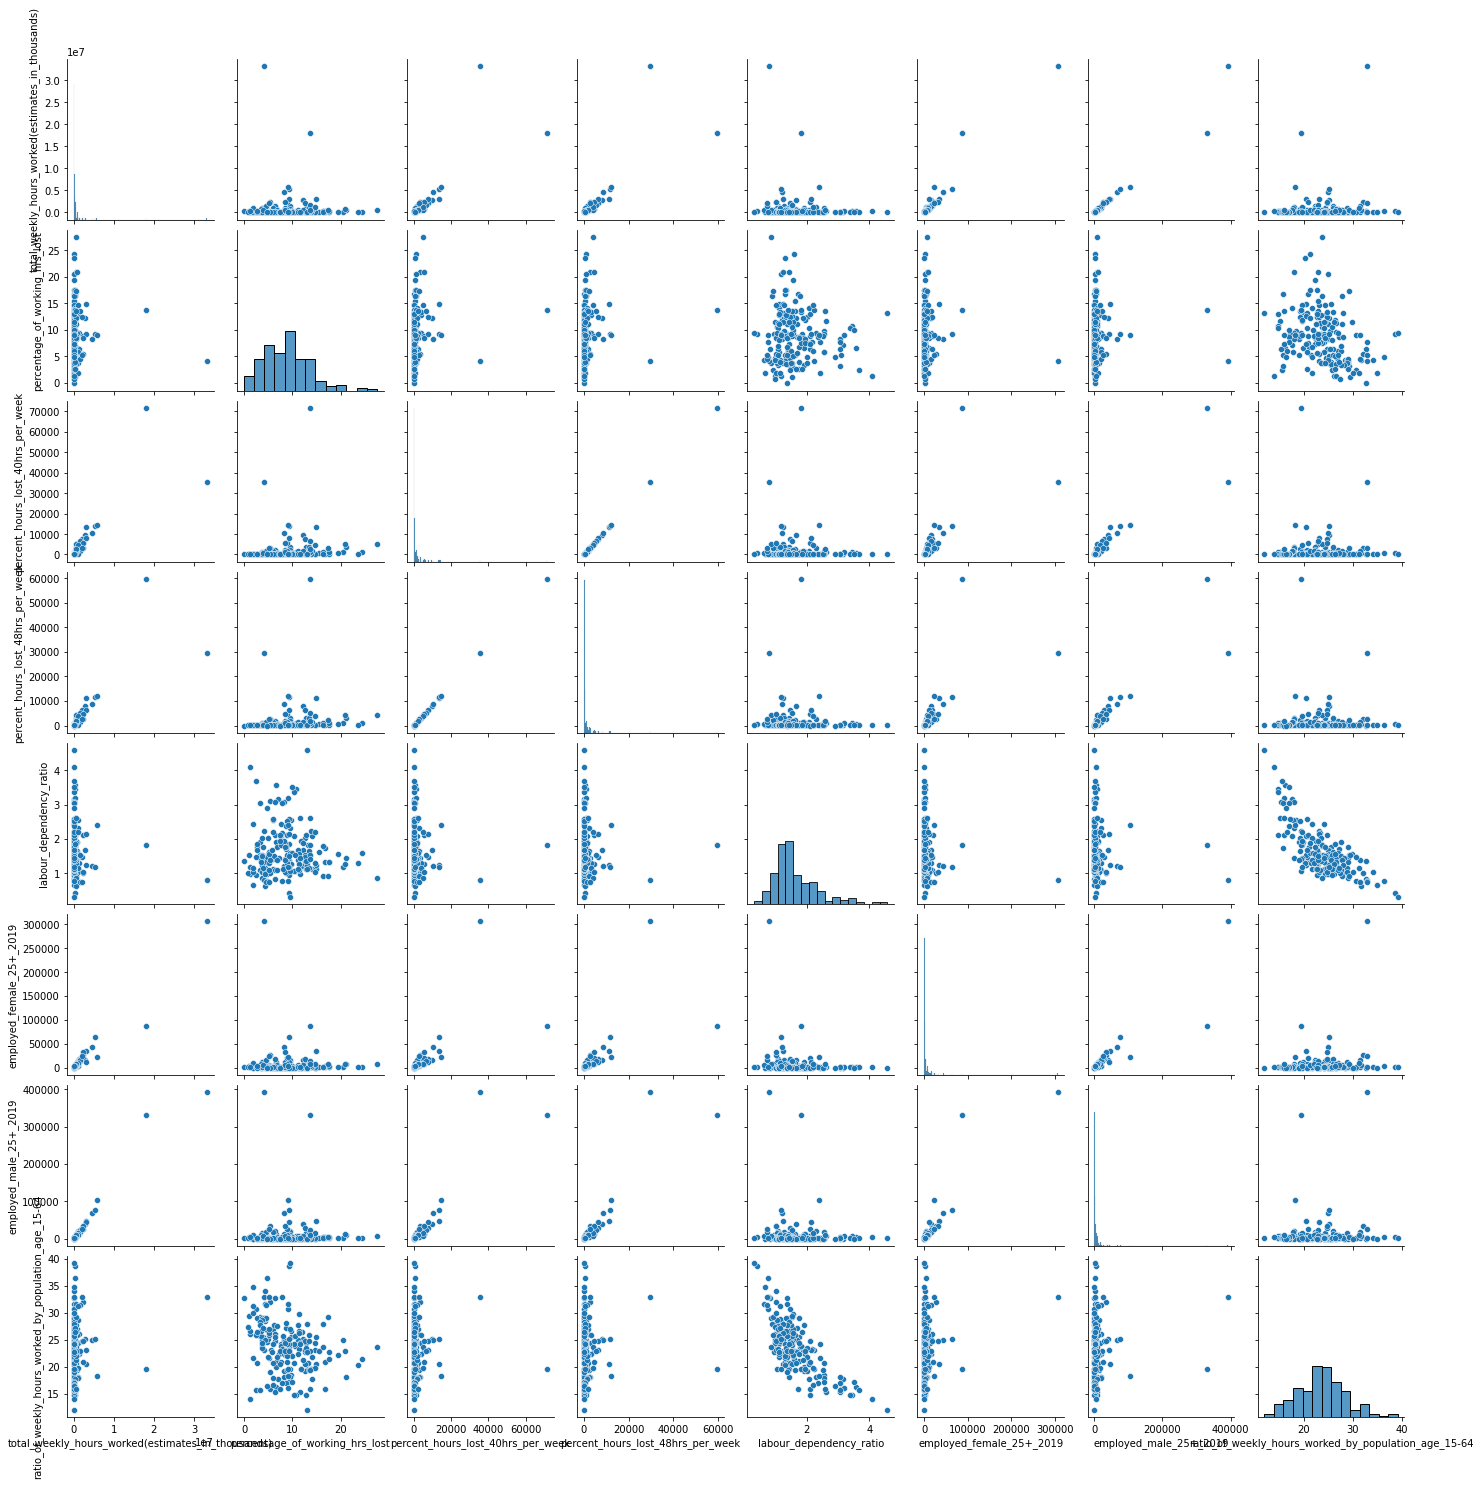

In [12]:
sns.pairplot(data_sv)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'total_weekly_hours_worked(estimates_in_thousands)'}>,
        <AxesSubplot:title={'center':'percentage_of_working_hrs_lost'}>,
        <AxesSubplot:title={'center':'percent_hours_lost_40hrs_per_week'}>],
       [<AxesSubplot:title={'center':'percent_hours_lost_48hrs_per_week'}>,
        <AxesSubplot:title={'center':'labour_dependency_ratio'}>,
        <AxesSubplot:title={'center':'employed_female_25+_2019'}>],
       [<AxesSubplot:title={'center':'employed_male_25+_2019'}>,
        <AxesSubplot:title={'center':'ratio_of_weekly_hours_worked_by_population_age_15-64'}>,
        <AxesSubplot:>]], dtype=object)

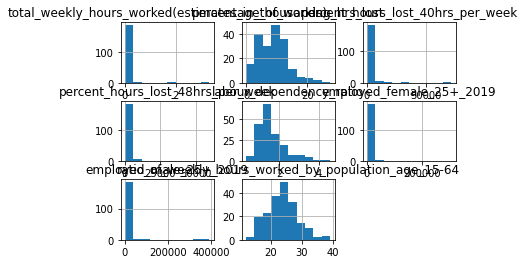

In [13]:
data_sv.hist()

<AxesSubplot:ylabel='country'>

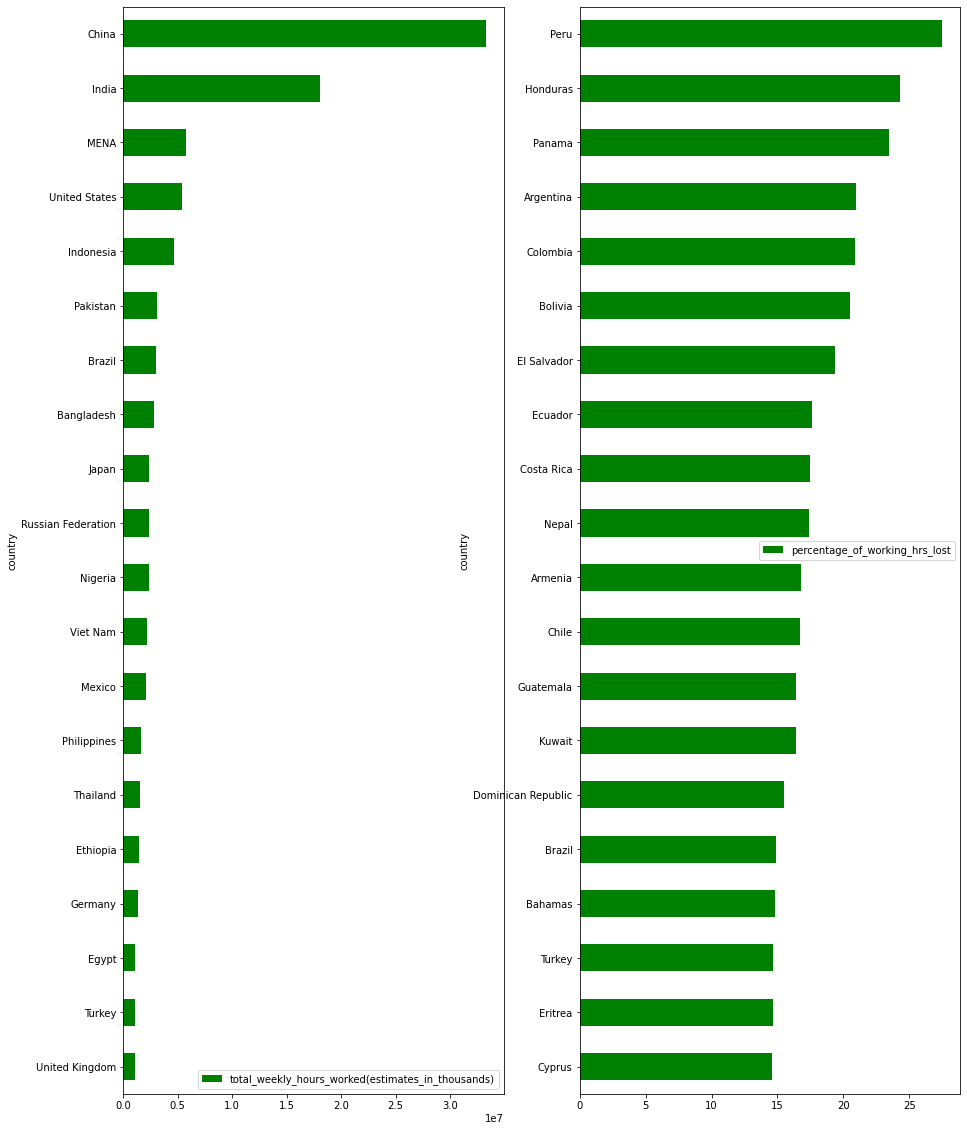

In [14]:
data_work_hour=data_sv.sort_values(by='total_weekly_hours_worked(estimates_in_thousands)',ascending=True).tail(20)
data_hrloss=data_sv.sort_values(by='percentage_of_working_hrs_lost',ascending=True).tail(20)
f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,20))
data_work_hour.plot(kind='barh',x='country',y='total_weekly_hours_worked(estimates_in_thousands)'
                    ,ax=ax1,color='green')
data_hrloss.plot(kind='barh',x='country',y='percentage_of_working_hrs_lost'
                    ,ax=ax2,color='green')

In [15]:
data_list2 = ['Northern Africa', 'Sub-Saharan Africa', 'Central Africa',
       'Eastern Africa', 'Southern Africa', 'Western Africa', 'Americas',
       'Latin America and the Caribbean', 'Caribbean',
       'Central America', 'South America', 'Northern America',
       'Arab States',
       'Asia and the Pacific', 'Eastern Asia', 'South-Eastern Asia and the Pacific',
       'South-Eastern Asia', 'Pacific Islands', 'Southern Asia', 'Europe and Central Asia',
       'European Union 28', 'G20',
       'ASEAN', 'BRICS', 'World excluding BRICS', 'G7','Arab League',
       'European Union 27']

In [16]:
data_sv2 = data[data.country.isin(data_list2)]

In [17]:
data_sv2['country'].unique()

array(['Northern Africa', 'Sub-Saharan Africa', 'Central Africa',
       'Eastern Africa', 'Southern Africa', 'Western Africa', 'Americas',
       'Latin America and the Caribbean', 'Caribbean', 'Central America',
       'South America', 'Northern America', 'Arab States',
       'Asia and the Pacific', 'Eastern Asia',
       'South-Eastern Asia and the Pacific', 'South-Eastern Asia',
       'Pacific Islands', 'Southern Asia', 'Europe and Central Asia',
       'European Union 28', 'G20', 'ASEAN', 'BRICS',
       'World excluding BRICS', 'G7', 'Arab League', 'European Union 27'],
      dtype=object)

<AxesSubplot:ylabel='country'>

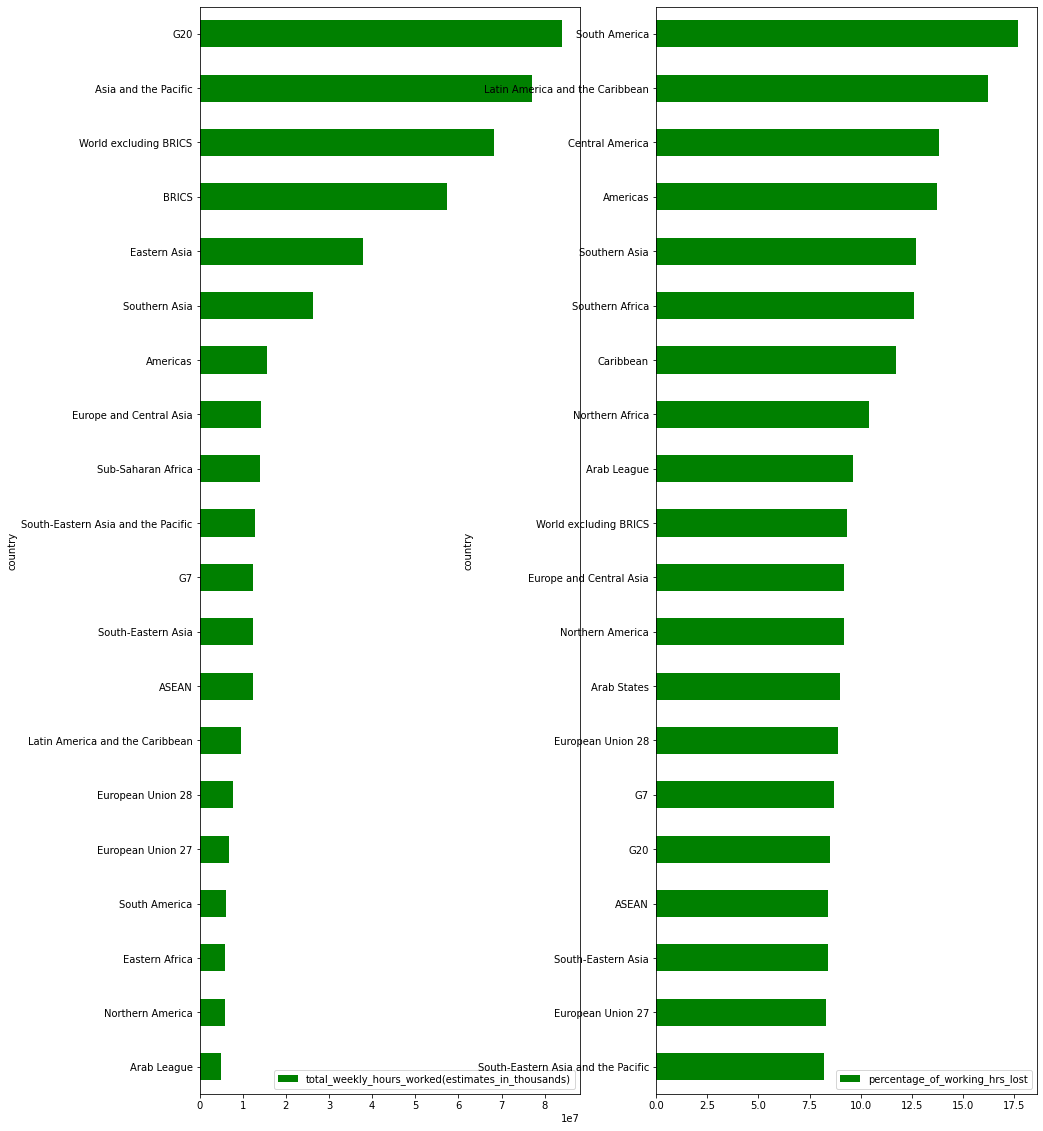

In [18]:
data_work_hour2=data_sv2.sort_values(by='total_weekly_hours_worked(estimates_in_thousands)',ascending=True).tail(20)
data_hrloss2=data_sv2.sort_values(by='percentage_of_working_hrs_lost',ascending=True).tail(20)
f,(ax1,ax2)=plt.subplots(1,2,figsize=(15,20))
data_work_hour2.plot(kind='barh',x='country',y='total_weekly_hours_worked(estimates_in_thousands)'
                    ,ax=ax1,color='green')
data_hrloss2.plot(kind='barh',x='country',y='percentage_of_working_hrs_lost'
                    ,ax=ax2,color='green')

array([[<AxesSubplot:title={'center':'total_weekly_hours_worked(estimates_in_thousands)'}>,
        <AxesSubplot:title={'center':'percentage_of_working_hrs_lost'}>,
        <AxesSubplot:title={'center':'percent_hours_lost_40hrs_per_week'}>],
       [<AxesSubplot:title={'center':'percent_hours_lost_48hrs_per_week'}>,
        <AxesSubplot:title={'center':'labour_dependency_ratio'}>,
        <AxesSubplot:title={'center':'employed_female_25+_2019'}>],
       [<AxesSubplot:title={'center':'employed_male_25+_2019'}>,
        <AxesSubplot:title={'center':'ratio_of_weekly_hours_worked_by_population_age_15-64'}>,
        <AxesSubplot:>]], dtype=object)

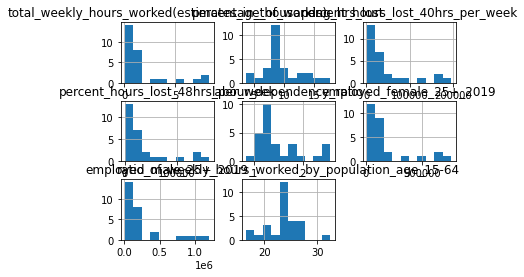

In [19]:
data_sv2.hist()

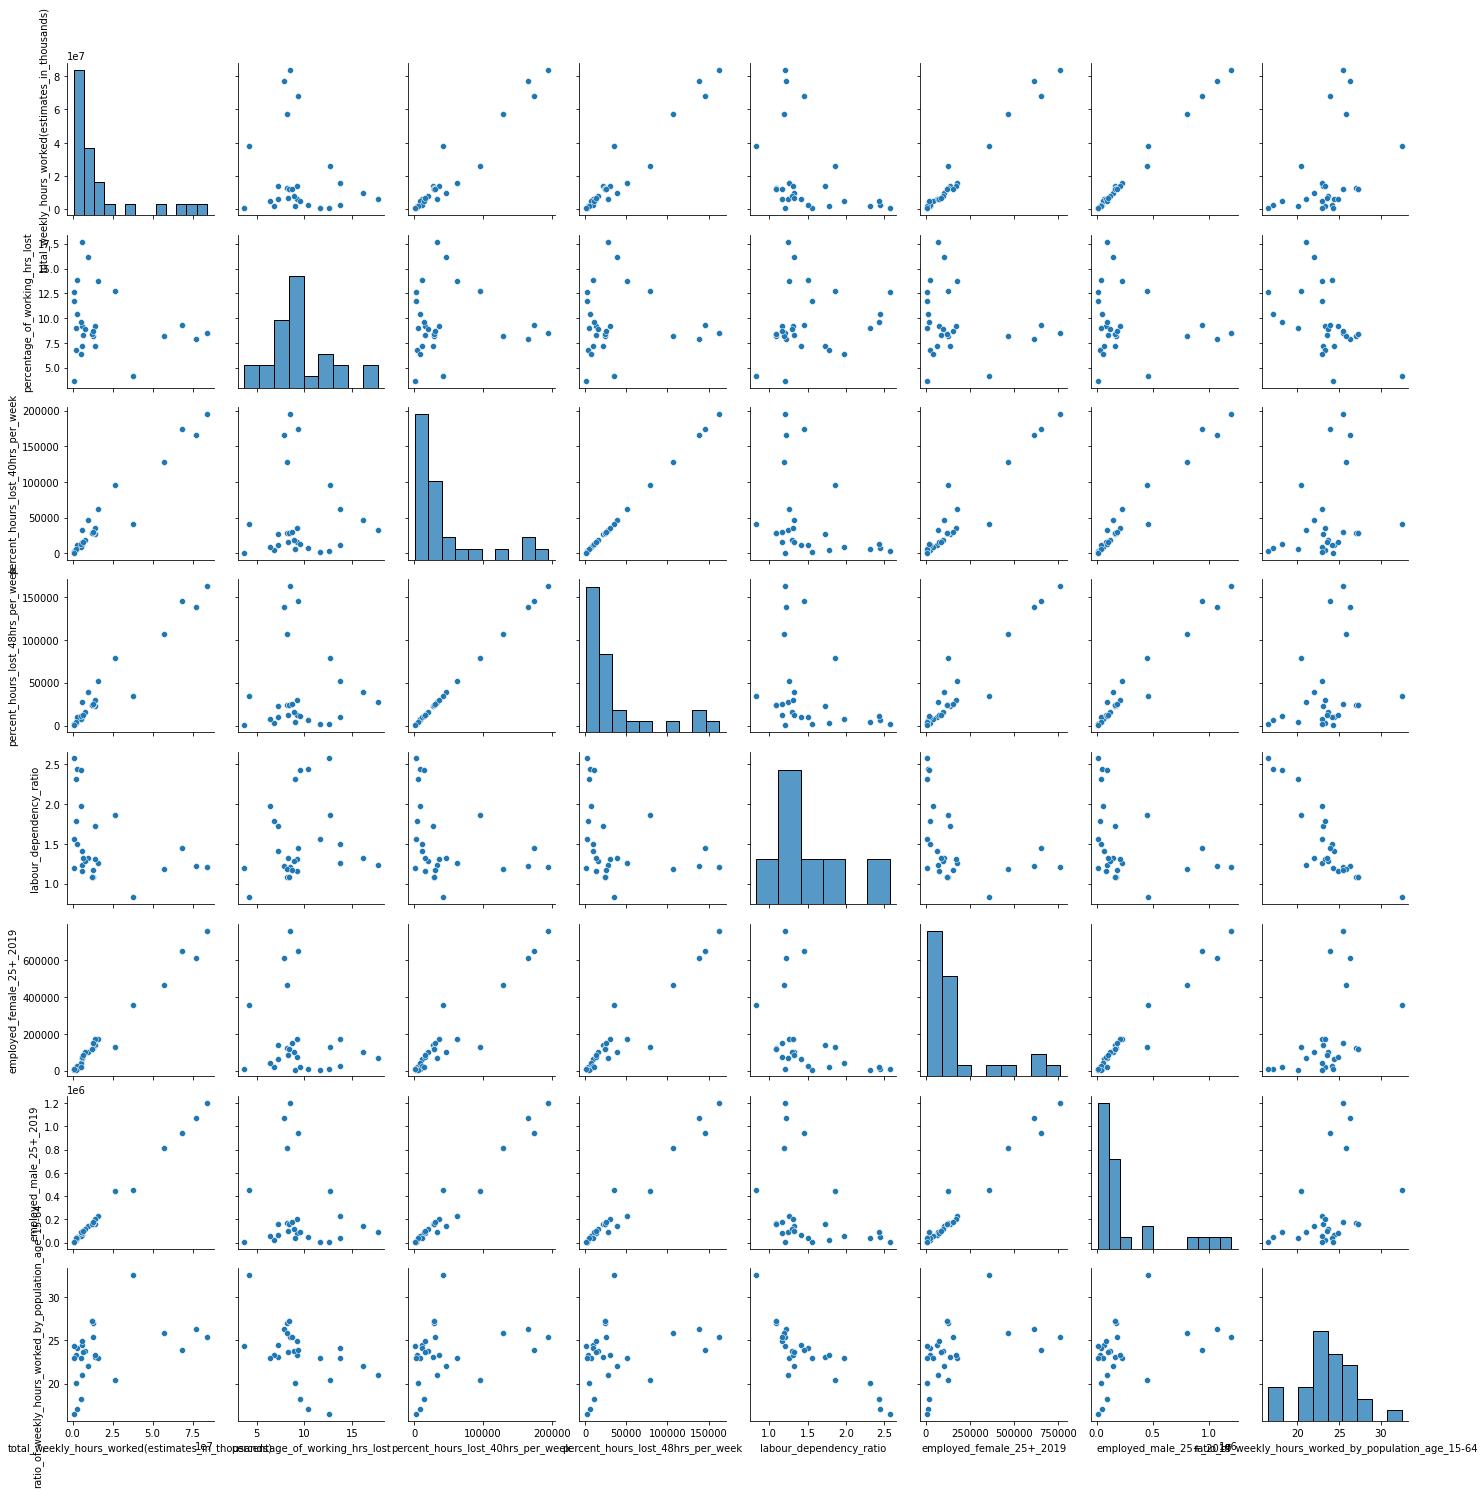

In [20]:
sns.pairplot(data_sv2)

<AxesSubplot:>

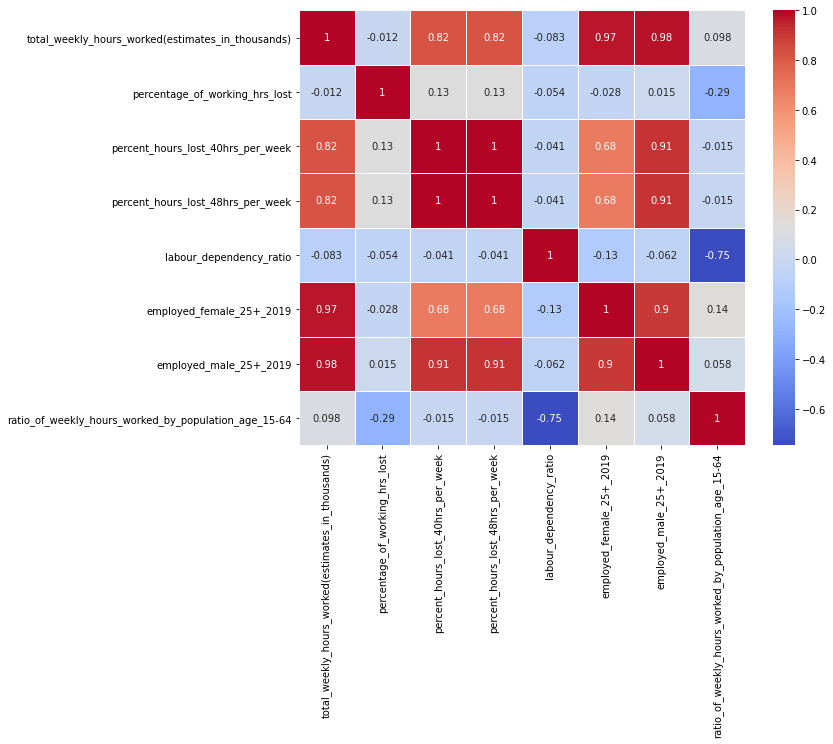

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(data_sv.corr(),annot=True,linewidth = 1, cmap='coolwarm')